# **Second Approch**

# Start of the code

In [1]:
# importing libraries 
import pandas as pd 
import numpy as np # importing libraries 
import torch
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import matplotlib.pyplot as plt 
import os 

In [2]:
print(torch.cuda.is_available())

True


In [3]:
df = pd.read_csv('selected_articles.csv')
df.drop(columns=['Unnamed: 0','caption'],inplace=True,axis=1)
df.head()

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,gender
0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens
1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens
2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens
3,111586001,Shape Up 30 den 1p Tights,Leggings,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...,womens
4,116379047,Frugan longsleeve,Top,Garment Upper body,Solid,Dark Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Fitted top in soft stretch jersey with a wide ...,womens


In [4]:
len(df)

55332

In [5]:
df.columns

Index(['article_id', 'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name', 'department_name',
       'index_name', 'index_group_name', 'section_name', 'garment_group_name',
       'detail_desc', 'gender'],
      dtype='object')

In [6]:
# from transformers import MarianMTModel, MarianTokenizer

# def back_translate(text, src_lang="en", intermediate_lang="fr"):
#     # Instantiate tokenizers and models
#     tokenizer_src = MarianTokenizer.from_pretrained(f"Helsinki-NLP/opus-mt-{src_lang}-{intermediate_lang}")
#     model_src = MarianMTModel.from_pretrained(f"Helsinki-NLP/opus-mt-{src_lang}-{intermediate_lang}")
#     tokenizer_inter = MarianTokenizer.from_pretrained(f"Helsinki-NLP/opus-mt-{intermediate_lang}-{src_lang}")
#     model_inter = MarianMTModel.from_pretrained(f"Helsinki-NLP/opus-mt-{intermediate_lang}-{src_lang}")

#     # Translate to intermediate language
#     translated = model_src.generate(**tokenizer_src(text, return_tensors="pt", padding=True, truncation=True))
#     inter_text = [tokenizer_src.decode(t, skip_special_tokens=True) for t in translated]

#     # Translate back to original language
#     back_translated = model_inter.generate(**tokenizer_inter(inter_text, return_tensors="pt", padding=True, truncation=True))
#     back_text = [tokenizer_inter.decode(t, skip_special_tokens=True) for t in back_translated]

#     return back_text

# # Example usage


In [7]:
# original_texts = ["mens Check Yellow Shirt, Shirt in checked flannel with a collar and chest pocket. Regular fit."]
# augmented_texts = [back_translate(text)[0] for text in original_texts]
# augmented_texts

# Loading Dataset and dropping incomplete rows

In [8]:
df['article_id'] = df['article_id'].astype(str)
df['article_id']=["0"+x for x in df['article_id']]

In [9]:
print(df['gender'].value_counts())
df.loc[df['gender'] == 'mens','gender'] = 'for male'
df.loc[df['gender'] == 'womens','gender'] = "women's"
print(df['gender'].value_counts())

gender
womens    35943
mens      11030
Name: count, dtype: int64
gender
women's     35943
for male    11030
Name: count, dtype: int64


In [10]:
len(df)

55332

In [11]:
# df2 = df.copy()

    Making caption more short for training purposes 

In [12]:
df['caption'] = df['graphical_appearance_name'] + ' ' + df['colour_group_name'] + ' ' + df['product_type_name']
df.loc[df['gender']== "women's",'caption'] = df['gender'] + ' ' + df['caption']
df.loc[df['gender']== 'for male','caption'] = df['caption'] + ' for male'

In [13]:
df['cap_length'] = df['caption'].apply(lambda x: len(x.split(' ')))

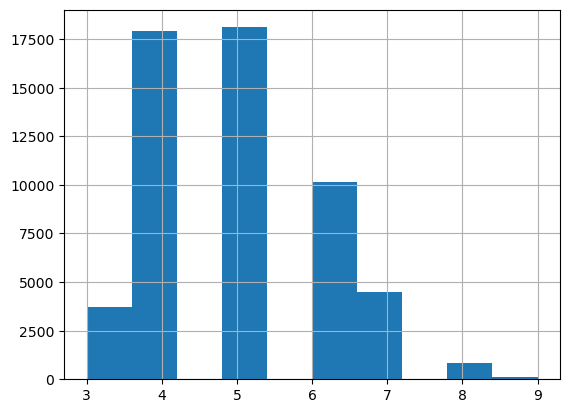

In [14]:
df['cap_length'].hist()
plt.show()

In [15]:
df.head(1)

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,gender,caption,cap_length
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,women's,women's Solid Black Vest top,5


In [16]:
df = df.iloc[:,[0,-2]].copy()
df.head(4)

,article_id,caption
0,0108775015,women's Solid Black Vest top
1,0108775044,women's Solid White Vest top
2,0108775051,women's Stripe Off White Vest top
3,0111586001,women's Solid Black Leggings


In [17]:
#dropping null values
print(df['caption'].isna().sum() )

df.dropna(inplace = True)
df.reset_index(drop = True,inplace = True)

print(df['caption'].isna().sum())
print(len(df))

0
0
55332


In [18]:
os.getcwd()

'/home/kudupudi.n'

In [19]:
os.listdir(os.getcwd())

['.bash_history',
 '.bash_logout',
 '.bash_profile',
 '.bashrc',
 '.cache',
 '.conda',
 '.config',
 '.emacs',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.kshrc',
 '.local',
 '.nv',
 'CLIP_finetuning_nikhil.ipynb',
 'finetune_duplicate.ipynb',
 'images',
 'model_checkpoint',
 'ondemand',
 'selected_articles.csv',
 'test_data.csv']

In [20]:
df['article_id'] = df['article_id'].apply(lambda x : '/home/kudupudi.n/images/'+ x+'.jpg')
df.head()

,article_id,caption
0,/home/kudupudi.n/images/0108775015.jpg,women's Solid Black Vest top
1,/home/kudupudi.n/images/0108775044.jpg,women's Solid White Vest top
2,/home/kudupudi.n/images/0108775051.jpg,women's Stripe Off White Vest top
3,/home/kudupudi.n/images/0111586001.jpg,women's Solid Black Leggings
4,/home/kudupudi.n/images/0116379047.jpg,women's Solid Dark Blue Top


In [21]:
df['article_id'][0]

'/home/kudupudi.n/images/0108775015.jpg'

In [22]:
df['t_f'] = df['article_id'].apply(lambda x: True if os.path.isfile(x) else False)
df

,article_id,caption,t_f
0,/home/kudupudi.n/images/0108775015.jpg,women's Solid Black Vest top,True
1,/home/kudupudi.n/images/0108775044.jpg,women's Solid White Vest top,True
2,/home/kudupudi.n/images/0108775051.jpg,women's Stripe Off White Vest top,True
3,/home/kudupudi.n/images/0111586001.jpg,women's Solid Black Leggings,True
4,/home/kudupudi.n/images/0116379047.jpg,women's Solid Dark Blue Top,True
...,...,...,...
55327,/home/kudupudi.n/images/0952937003.jpg,women's All over pattern Beige Dress,True
55328,/home/kudupudi.n/images/0952938001.jpg,women's All over pattern Beige Top,True
55329,/home/kudupudi.n/images/0953763001.jpg,women's Solid Black Vest top,True
55330,/home/kudupudi.n/images/0956217002.jpg,women's Solid Black Dress,True


In [23]:
df['t_f'].value_counts()

t_f
True     55173
False      159
Name: count, dtype: int64

    Removing the rows with false values

In [24]:
keep_indx = list(df.loc[df['t_f'] == True].index)
df = df.iloc[keep_indx,:].reset_index(drop = True)
df.head()

,article_id,caption,t_f
0,/home/kudupudi.n/images/0108775015.jpg,women's Solid Black Vest top,True
1,/home/kudupudi.n/images/0108775044.jpg,women's Solid White Vest top,True
2,/home/kudupudi.n/images/0108775051.jpg,women's Stripe Off White Vest top,True
3,/home/kudupudi.n/images/0111586001.jpg,women's Solid Black Leggings,True
4,/home/kudupudi.n/images/0116379047.jpg,women's Solid Dark Blue Top,True


# Converting data 
    converting the data to appropriate format for the pytorch and CLIP model

In [25]:
import os
from PIL import Image
import numpy as np
import os

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm

torch.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [26]:
class image_title_dataset():
    def __init__(self, text_paths, list_image_path):
        self.text_paths = text_paths
        self.list_image_path = list_image_path

    def __len__(self):
        return len(self.text_paths)

    def __getitem__(self, idx):
        return self.list_image_path[idx], self.text_paths[idx]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train,val = train_test_split(df, test_size=0.2, random_state= 42)
# train,test = train_test_split(train, test_size=0.2, random_state= 42)

train.reset_index(inplace= True,drop= True)
val.reset_index(inplace= True,drop= True)

# test.reset_index(inplace= True,drop= True)

print('train')
print(len(train))
# print('\n')
# print('test')
# print(len(test))
print('\n')
print('val')
print(len(val))

train
44138


val
11035


In [29]:
## women's Solid Pink Heeled sandals
train['caption'][0] #  result shoould be same to above text 

"women's Solid Pink Heeled sandals"

In [54]:
# ## 'mens Solid Black Sweater, Jacket in soft fleece designed to be worn either as a jacket or as a thermal mid layer. 
# ## Stand-up collar, concealed zip down the front and side pockets. Unlined. Regular Fit. The polyester content of the jacket is partly recycled.'

# test['caption'][0] #  result shoould be same to above text 

In [25]:
## Slub Light Pink T-shirt for male

val['caption'][0] #  result shoould be same to above text 

'Slub Light Pink T-shirt for male'

In [32]:
train_dataloader = DataLoader(image_title_dataset(train['caption'], train['article_id']), batch_size = 256, shuffle= True)
# test_dataloader = DataLoader( image_title_dataset(test['caption'], test['article_id']), batch_size= 32,shuffle= True)
val_dataloader = DataLoader( image_title_dataset(val['caption'], val['article_id']), batch_size= 256)

In [33]:
len(train_dataloader)

173

In [34]:
from torchvision import transforms

image_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=224, scale=(0.85, 1.0), ratio=(3./4., 4./3.)),
    
    # Color Jitter with moderate intensity
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    
    # Random Horizontal Flipping with the same probability
    transforms.RandomHorizontalFlip(p=0.5),
    
    # Adding Random Vertical Flipping back with a lower probability for moderate augmentation
    transforms.RandomVerticalFlip(p=0.2),
])




In [65]:
# temp_transform = image_transform = transforms.Compose([
#     # Random Resizing and Cropping with smaller scale and ratio range 
#     transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0), ratio=(3./4., 4./3.)),])

In [66]:
# temp_transform(Image.open('/home/kudupudi.n/images/0203595048.jpg').resize((526,526)))

# Training the model

In [35]:
def convert_models_to_fp32(model): 
    for p in model.parameters(): 
        p.data = p.data.float() 
        p.grad.data = p.grad.data.float() 

In [36]:
# !pip install clip
# import clip 

In [37]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

#defining optimizer and losses 
optimizer = torch.optim.Adam(model.parameters(), lr= 5e-6,betas=(0.9,0.98),eps=1e-6,weight_decay=0.2)
loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()

# saving model parameters for further use
save_dir = 'model_checkpoint'
os.makedirs(save_dir, exist_ok=True)
checkpoint_path = os.path.join(save_dir, 'CLIP_finetuned_no_detail_desc.pth')


num_epochs = 4
for epoch in range(num_epochs):
    pbar = tqdm(train_dataloader, total=len(train_dataloader))
    for batch in pbar:
        optimizer.zero_grad()

        imgs,texts = batch 
        # desired_size = (224, 224)
        # images = [Image.open(img_path) for img_path in imgs]
        images = [image_transform(Image.open(img_path)) for img_path in imgs]
        texts = list(texts)
    
        inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, truncation= True, max_length = 77)
        inputs = {key: value.to(device) for key, value in inputs.items()}
        
        # Forward pass
        outputs = model(**inputs)
        logits_per_image, logits_per_text = outputs.logits_per_image, outputs.logits_per_text
        
        # Compute loss
        ground_truth = torch.arange(len(images),dtype=torch.long,device=device)
        total_loss = (loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2
        
        # Backward pass
        total_loss.backward()
        if device == "cpu":
            optimizer.step()
        else : 
            convert_models_to_fp32(model)
            optimizer.step()

        
        pbar.set_description(f"Epoch {epoch}/{num_epochs}, Loss: {total_loss.item():.4f}")

    # Save (overwrite) the model and optimizer state at the end of each epoch
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': total_loss.item(),
    }, checkpoint_path)

    print(f"Checkpoint saved (overwritten) for epoch {epoch+1} at {checkpoint_path}")
    

    # Validation phase
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0
    with torch.no_grad():  # No gradients needed for validation
        for batch in val_dataloader:
            images, texts = batch

            # desired_size = (224, 224)
            # images = [Image.open(img_path) for img_path in images]
            images = [image_transform(Image.open(img_path)) for img_path in images]
            texts = list(texts)
            
            inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, truncation= True, max_length = 77)
            inputs = {key: value.to(device) for key, value in inputs.items()}

            outputs = model(**inputs)
            logits_per_image, logits_per_text = outputs.logits_per_image, outputs.logits_per_text

            ground_truth = torch.arange(len(images), dtype=torch.long, device=device)
            val_loss = (loss_img(logits_per_image, ground_truth) + loss_txt(logits_per_text, ground_truth)) / 2
            total_val_loss += val_loss.item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f"Epoch {epoch}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}")


Epoch 0/4, Loss: 0.9640: 100%|██████████| 173/173 [40:11<00:00, 13.94s/it]


Checkpoint saved (overwritten) for epoch 1 at model_checkpoint/CLIP_finetuned_no_detail_desc.pth
Epoch 0/4, Validation Loss: 1.3931


Epoch 1/4, Loss: 0.7586: 100%|██████████| 173/173 [38:48<00:00, 13.46s/it]


Checkpoint saved (overwritten) for epoch 2 at model_checkpoint/CLIP_finetuned_no_detail_desc.pth
Epoch 1/4, Validation Loss: 1.2899


Epoch 2/4, Loss: 0.6360: 100%|██████████| 173/173 [38:06<00:00, 13.22s/it]


Checkpoint saved (overwritten) for epoch 3 at model_checkpoint/CLIP_finetuned_no_detail_desc.pth
Epoch 2/4, Validation Loss: 1.1992


Epoch 3/4, Loss: 0.7469: 100%|██████████| 173/173 [38:21<00:00, 13.31s/it]


Checkpoint saved (overwritten) for epoch 4 at model_checkpoint/CLIP_finetuned_no_detail_desc.pth
Epoch 3/4, Validation Loss: 1.1696


# Testing 

## Fine Tunned Model

In [38]:
from transformers import CLIPModel, CLIPProcessor, CLIPTokenizer

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize the model architecture
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# Load the fine-tuned model parameters
model_file = torch.load('model_checkpoint/CLIP_finetuned_no_detail_desc.pth', map_location=device)
model.load_state_dict(model_file['model_state_dict'])
model.to(device)  # Move model to the appropriate device (CPU or GPU)


# Load the processor and tokenizer
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")


In [39]:
def get_single_image_embedding(my_image):
    image = processor(
    		text = None,
    		images = my_image,
    		return_tensors="pt"
    		)["pixel_values"].to(device)
    
    embedding = model.get_image_features(image)
    embedding_as_np = embedding.cpu().detach().numpy() 
    return embedding_as_np


def get_single_text_embedding(text): 
    inputs = tokenizer(text, return_tensors = "pt") .to(device)
    text_embeddings = model.get_text_features(**inputs)

 	# convert the embeddings to numpy array
    embedding_as_np = text_embeddings.cpu().detach().numpy()
    return embedding_as_np

In [42]:
val

,article_id,caption,t_f
0,/home/kudupudi.n/images/0591466007.jpg,Slub Light Pink T-shirt for male,True
1,/home/kudupudi.n/images/0560030013.jpg,Solid White Shirt for male,True
2,/home/kudupudi.n/images/0811777001.jpg,women's Stripe Blue Bikini top,True
3,/home/kudupudi.n/images/0669895007.jpg,Solid White Sweater,True
4,/home/kudupudi.n/images/0653018001.jpg,women's Solid Light Grey Top,True
...,...,...,...
11030,/home/kudupudi.n/images/0377289002.jpg,women's Solid Black Swimsuit,True
11031,/home/kudupudi.n/images/0649538001.jpg,women's All over pattern Beige Jacket,True
11032,/home/kudupudi.n/images/0560216002.jpg,women's Solid Purple Bikini top,True
11033,/home/kudupudi.n/images/0622238014.jpg,All over pattern Black Sweater,True


In [43]:
val['img_embeddings'] = val['article_id'].apply(lambda x: get_single_image_embedding(Image.open(x)))

In [45]:
val.head()

,article_id,caption,t_f,img_embeddings
0,/home/kudupudi.n/images/0591466007.jpg,Slub Light Pink T-shirt for male,True,"[[-0.20940694, 0.024340227, 0.1386212, 0.25855..."
1,/home/kudupudi.n/images/0560030013.jpg,Solid White Shirt for male,True,"[[-0.060421593, 0.13911465, 0.18465179, 0.5185..."
2,/home/kudupudi.n/images/0811777001.jpg,women's Stripe Blue Bikini top,True,"[[-0.17621809, -0.0926411, 0.054659415, 0.0758..."
3,/home/kudupudi.n/images/0669895007.jpg,Solid White Sweater,True,"[[-0.17166968, 0.074997336, 0.27569646, 0.2189..."
4,/home/kudupudi.n/images/0653018001.jpg,women's Solid Light Grey Top,True,"[[-0.4064285, -0.08073504, -0.072857365, 0.413..."


In [62]:
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display

def get_top_N_images(query, data, top_K=4):
    
    query_vect = get_single_text_embedding(query)
  
    # Relevant columns
    revevant_cols = ["caption", "article_id", "cos_sim"]
    # Run similarity Search
    data["cos_sim"] = data["img_embeddings"].apply(lambda x: cosine_similarity(query_vect, x))# line 17
    data["cos_sim"] = data["cos_sim"].apply(lambda x: x[0][0])
    """
    Retrieve top_K (4 is default value) articles similar to the query
    """
    most_similar_articles = data.sort_values(by='cos_sim',  ascending=False)[1:top_K+1] # line 24
    
    return most_similar_articles[revevant_cols].reset_index()

In [56]:
val.head()

,article_id,caption,t_f,img_embeddings,cos_sim
0,/home/kudupudi.n/images/0591466007.jpg,Slub Light Pink T-shirt for male,True,"[[-0.20940694, 0.024340227, 0.1386212, 0.25855...",0.363050
1,/home/kudupudi.n/images/0560030013.jpg,Solid White Shirt for male,True,"[[-0.060421593, 0.13911465, 0.18465179, 0.5185...",0.202769
2,/home/kudupudi.n/images/0811777001.jpg,women's Stripe Blue Bikini top,True,"[[-0.17621809, -0.0926411, 0.054659415, 0.0758...",0.135476
3,/home/kudupudi.n/images/0669895007.jpg,Solid White Sweater,True,"[[-0.17166968, 0.074997336, 0.27569646, 0.2189...",0.149569
4,/home/kudupudi.n/images/0653018001.jpg,women's Solid Light Grey Top,True,"[[-0.4064285, -0.08073504, -0.072857365, 0.413...",0.176259


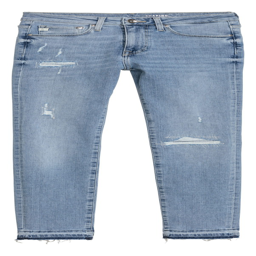

women's Denim Light Blue Trousers




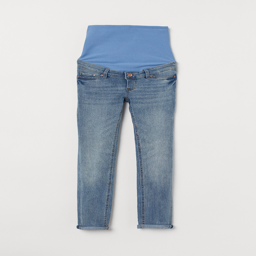

women's Denim Light Blue Trousers




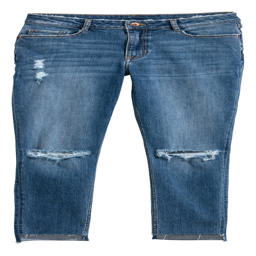

Solid Light Blue Trousers




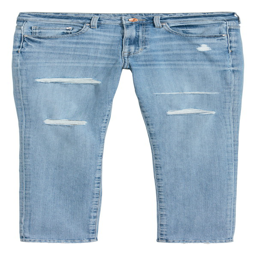

women's Denim Light Blue Trousers




In [77]:
for index, rows in get_top_N_images('womens blue denim jeans',val).iterrows():

    display(Image.open(rows['article_id']).resize((256,256)))
    print(rows['caption'])
    print('\n')